# 📌 Klasifikasi Wine Quality dengan Decision Tree
Notebook ini bertujuan untuk membangun model klasifikasi yang dapat memprediksi kualitas wine berdasarkan berbagai fitur kimiawi yang dimilikinya.

Dataset yang digunakan memiliki label kualitas dengan rentang nilai tertentu (misalnya 3–9), sehingga permasalahan ini termasuk dalam multiclass classification.

Metode utama yang digunakan adalah Decision Tree Classifier, salah satu algoritma pembelajaran terawasi yang bekerja dengan cara membagi data ke dalam cabang-cabang keputusan hingga diperoleh prediksi kelas.

Melalui notebook ini, akan dilakukan tahapan:
1. Eksplorasi data untuk memahami distribusi fitur dan label.
2. Preprocessing & resampling (SMOTE) untuk menangani distribusi kelas.
3. Pembangunan model Decision Tree.
4. Evaluasi model menggunakan metrik seperti akurasi, confusion matrix, dan classification report.

Dengan pendekatan ini, diharapkan dapat diperoleh gambaran sejauh mana Decision Tree mampu memprediksi kualitas wine secara akurat.

## 1. Import Library

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

## 2. Load Dataset

In [2]:
df_white = pd.read_csv("dataset/winequality-white.csv", delimiter=";")
df_red = pd.read_csv("dataset/winequality-red.csv", delimiter=";")

df = pd.concat([df_red, df_white], axis=0)

## 3.  EDA

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [5]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


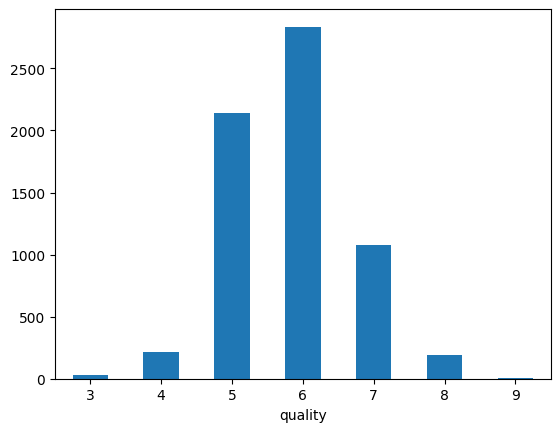

In [6]:
df['quality'].value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

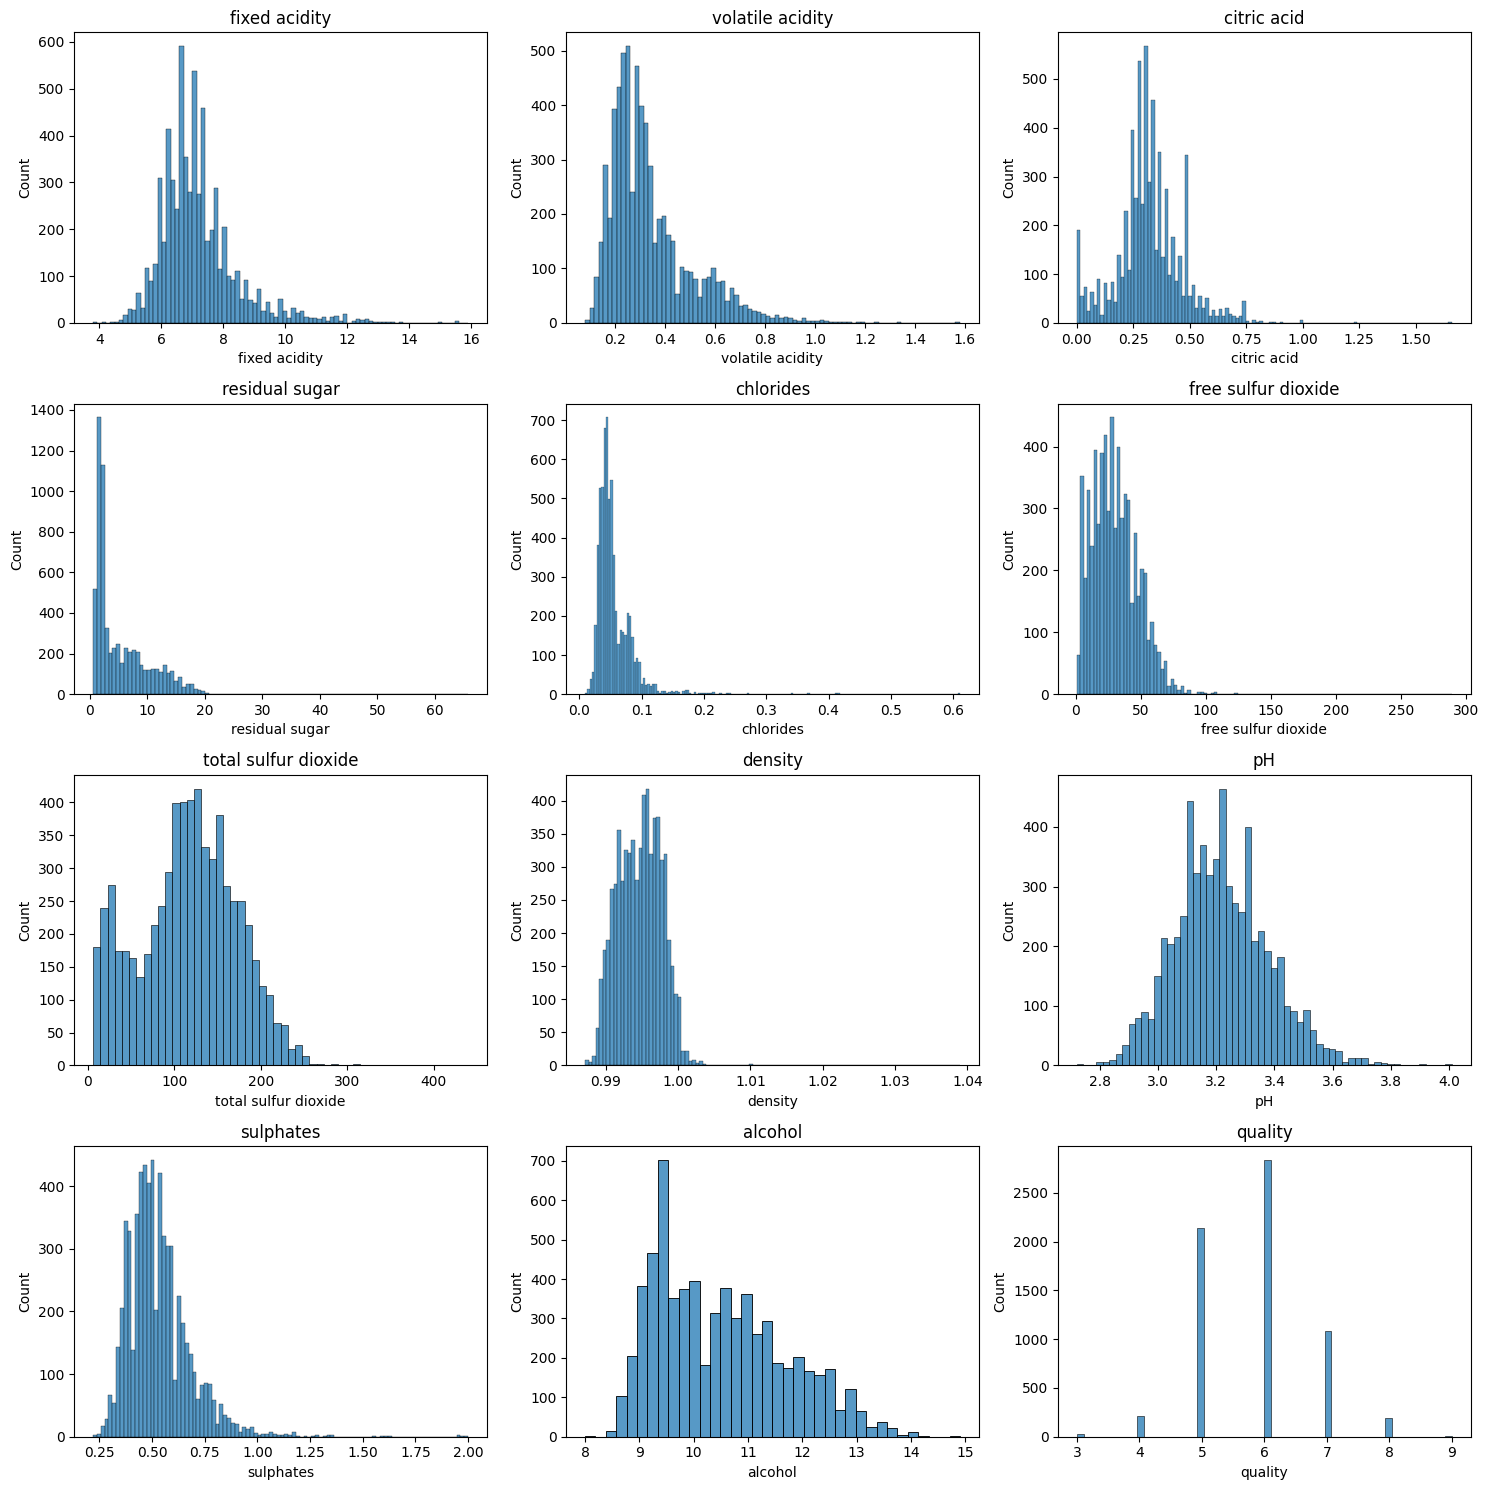

In [7]:
fig, axes = plt.subplots(4, 3, figsize=(15,15))
axes = axes.flatten()

for i, col in enumerate(df.select_dtypes(include=['int64', 'float64', 'object'])):
    sns.histplot(df[col], ax=axes[i])
    axes[i].tick_params(axis='x')
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

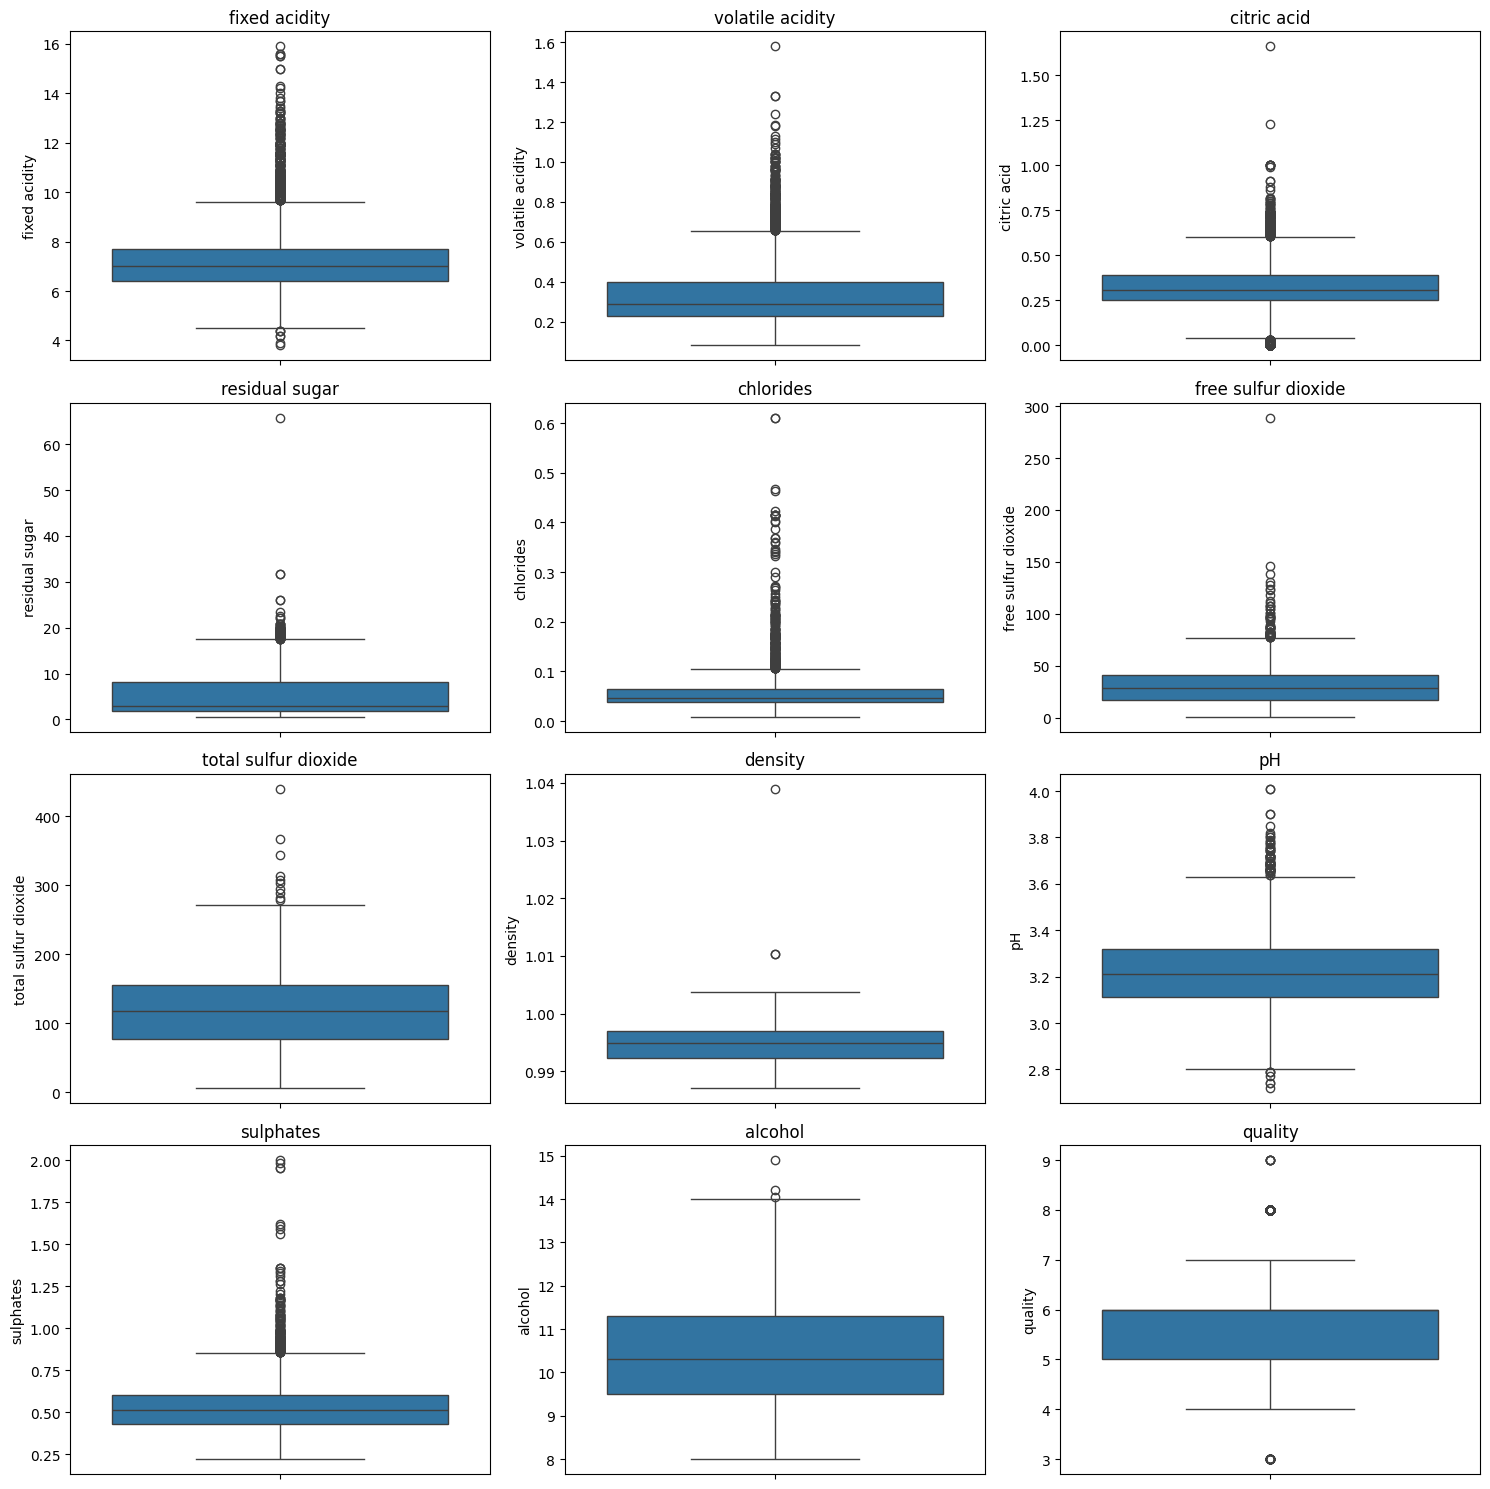

In [8]:
fig, axes = plt.subplots(4, 3, figsize=(15,15))
axes = axes.flatten()

for i, col in enumerate(df.select_dtypes(include=['int64', 'float64', 'object'])):
    sns.boxplot(df[col], ax=axes[i])
    axes[i].tick_params(axis='x') 
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

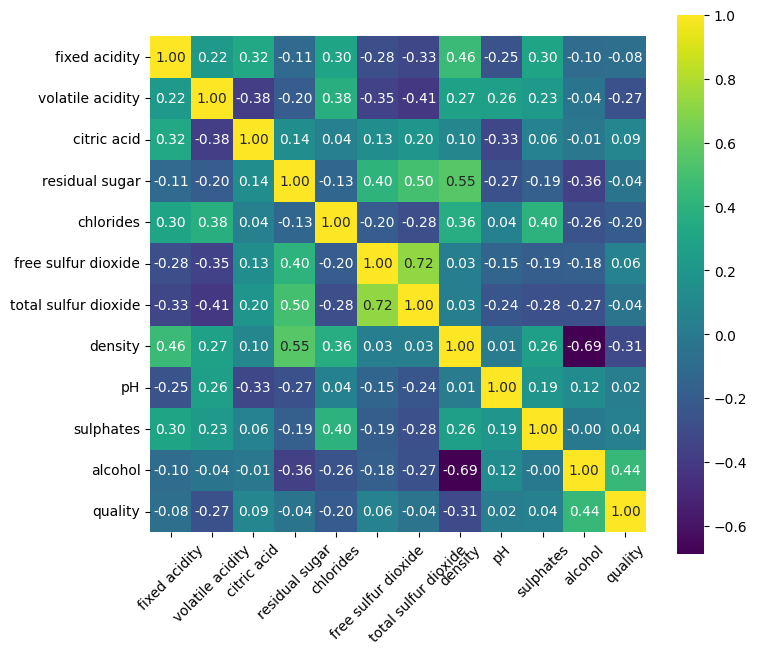

In [9]:
plt.figure(figsize=(8, 7))
korelasi = df.select_dtypes(include=['int64', 'float64']).corr(method='pearson')
sns.heatmap(korelasi, annot=True, fmt='.2f', cmap='viridis', square=True)
plt.xticks(rotation=45)
plt.show()

## 4. preprocessing

In [10]:
x = df.drop('quality', axis=1)
y = df['quality']

In [11]:
smote = SMOTE(random_state=42, k_neighbors=3)
x_res, y_res = smote.fit_resample(x, y)
df_after_smote = pd.concat([x_res, y_res], axis=1)

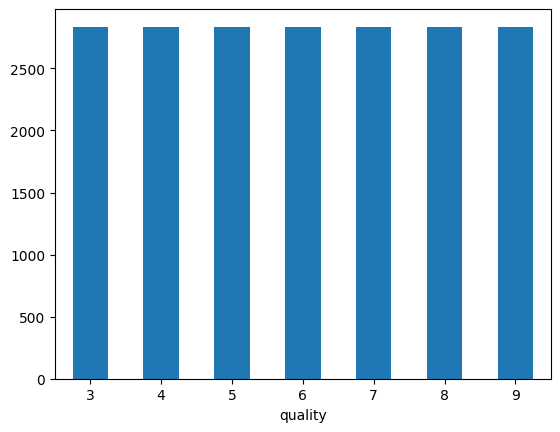

In [12]:
y_res.value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

kita pisah datasetnya setelah SMOTE

In [13]:
x = df_after_smote.drop('quality', axis=1)
y = df_after_smote['quality']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

## 5. Training Model

In [ ]:
dt_gini = DecisionTreeClassifier(random_state=42, criterion='gini')
dt_entropy = DecisionTreeClassifier(random_state=42, criterion='entropy')

dt_gini.fit(X_train, y_train)
y_pred_gini = dt_gini.predict(X_test)

dt_entropy.fit(X_train, y_train)
y_pred_entropy = dt_entropy.predict(X_test)

## 7. Evaluasi Model

In [15]:
print("Accuracy Decision Tree Gini:", accuracy_score(y_test, y_pred_gini))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gini))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gini))

Accuracy Decision Tree Gini: 0.8280030219088391

Confusion Matrix:
 [[559   2   3   2   1   0   0]
 [  6 516  24  18   1   2   0]
 [  6  41 387 107  23   3   0]
 [  5  16 106 330  81  30   0]
 [  0   8  18  86 422  33   0]
 [  0   1   8  14  37 506   1]
 [  0   0   0   0   0   0 568]]

Classification Report:
               precision    recall  f1-score   support

           3       0.97      0.99      0.98       567
           4       0.88      0.91      0.90       567
           5       0.71      0.68      0.70       567
           6       0.59      0.58      0.59       568
           7       0.75      0.74      0.75       567
           8       0.88      0.89      0.89       567
           9       1.00      1.00      1.00       568

    accuracy                           0.83      3971
   macro avg       0.83      0.83      0.83      3971
weighted avg       0.83      0.83      0.83      3971



In [16]:
print("Accuracy Decision Tree Entropy:", accuracy_score(y_test, y_pred_entropy))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_entropy))
print("\nClassification Report:\n", classification_report(y_test, y_pred_entropy))

Accuracy Decision Tree Entropy: 0.8139007806597834

Confusion Matrix:
 [[559   1   5   0   2   0   0]
 [  3 512  31  15   6   0   0]
 [ 17  46 358 114  23   9   0]
 [  5  21  92 320  98  30   2]
 [  3  10  39  71 399  44   1]
 [  0   0   2  19  29 516   1]
 [  0   0   0   0   0   0 568]]

Classification Report:
               precision    recall  f1-score   support

           3       0.95      0.99      0.97       567
           4       0.87      0.90      0.89       567
           5       0.68      0.63      0.65       567
           6       0.59      0.56      0.58       568
           7       0.72      0.70      0.71       567
           8       0.86      0.91      0.89       567
           9       0.99      1.00      1.00       568

    accuracy                           0.81      3971
   macro avg       0.81      0.81      0.81      3971
weighted avg       0.81      0.81      0.81      3971



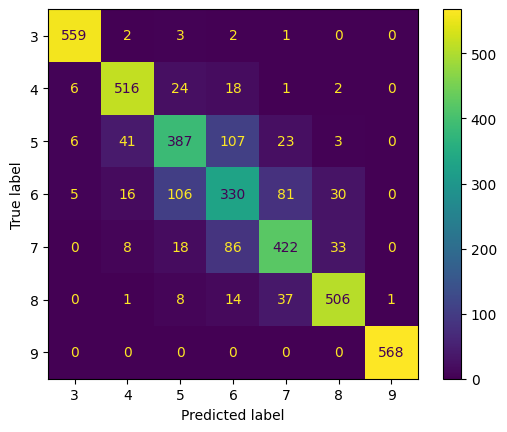

In [17]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_gini)
plt.show()

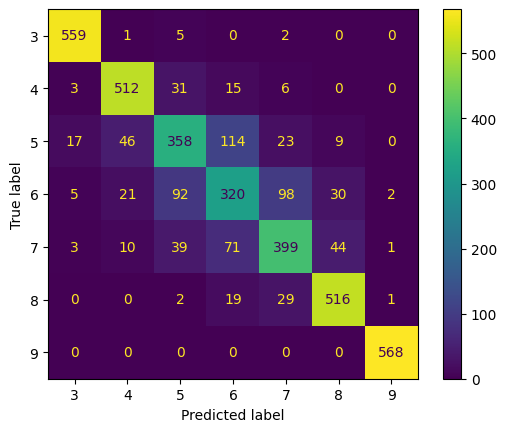

In [18]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_entropy)
plt.show()

Jadi kesimpulannya, pakai gini index itu sedikit lebih baik dibanding pakai entropy pada kasus ini